In [41]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(path, header = None)
headers = [["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]]
df.columns = headers

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

In [42]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [43]:
print(df.shape)
print(df.dtypes)

(2772, 7)
age                object
gender              int64
bmi               float64
no_of_children      int64
smoker             object
region              int64
charges           float64
dtype: object


In [44]:
df.info()

# missing_data = df.isnull()

# for column in missing_data.columns.values.tolist():
#     print(column)
#     print (missing_data[column].value_counts())
#     print("")   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (age,)             2772 non-null   object 
 1   (gender,)          2772 non-null   int64  
 2   (bmi,)             2772 non-null   float64
 3   (no_of_children,)  2772 non-null   int64  
 4   (smoker,)          2772 non-null   object 
 5   (region,)          2772 non-null   int64  
 6   (charges,)         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [45]:
df = df.replace('?',np.nan)
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)
# df["age"] = df["age"].astype("int")

/tmp/ipykernel_6040/3716667433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].replace(np.nan, mean_age, inplace=True)


In [ ]:
df['age'].dtypes    
df["age"] = df["age"].astype("int")

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.

In [ ]:
df.replace('?', np.nan, inplace = True)

is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)
df["smoker"] = df["smoker"].astype("int")

In [19]:
df['smoker'].value_counts()

(smoker,)
0            2201
1             564
Name: count, dtype: int64

In [9]:
df['charges'] = df['charges'].round(2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


              bmi   charges
bmi      1.000000  0.199846
charges  0.199846  1.000000


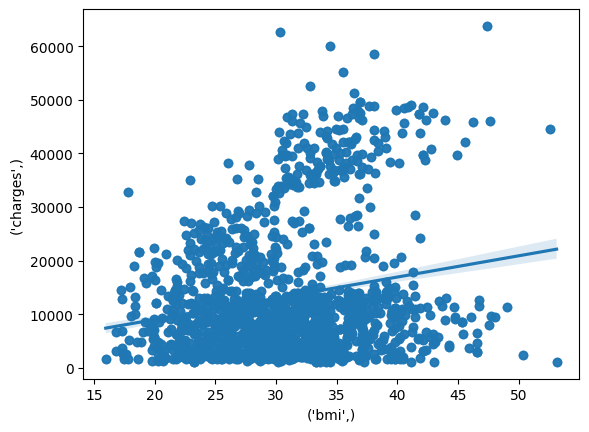

In [10]:
sns.regplot(x = 'bmi', y = 'charges', data = df)
print(df[["bmi", "charges"]].corr())

In [ ]:
sns.boxplot(x="smoker", y="charges", data=df)
